In [2]:
import numpy as np

### Generating data 'X' ranges between -10 to 10 
### 'Y' is a linear combination of parameters as Y = ax1+bx2+c+gaussian(0,epsilon)

In [3]:
Number_of_points = 1000
X_data = np.linspace(-10,10,Number_of_points)
W0_true = 11
W1_true = 4.5
W2_true = 3
Y_data = W2_true*X_data**2 + W1_true*X_data + W0_true + np.random.normal(0,0.5,Number_of_points)

### Split the data into training and testing set

In [4]:
Number_of_training = int(Number_of_points*0.8)
Number_of_testing = int(Number_of_points*0.2)
index = np.random.permutation(Number_of_points) #A random permutation of 1..N is generated

In [5]:
X_train = X_data[index[:Number_of_training]] 
Y_train = Y_data[index[:Number_of_training]]

In [6]:
X_test = X_data[index[Number_of_training:]]
Y_test = Y_data[index[Number_of_training:]]

### Plot the data points

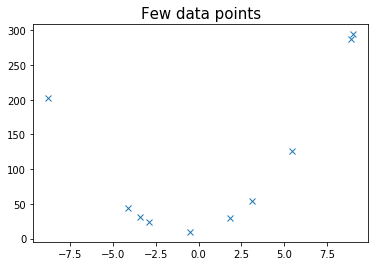

In [10]:
import matplotlib.pyplot as plt
def plot(x,y,title):
    fig,(ax1) = plt.subplots(1)
    if title!='Loss':
        ax1.plot(x,y,'x')
    else:
        ax1.plot(x,y)
        
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
def plot_curve(x,y,W0,W1,W2,title):
    fig,(ax1) = plt.subplots(1)
    ax1.plot(x,y,'x',color='red',markersize=1)
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    y = W0 + W1*x +W2*np.power(x,2)
    ax1.plot(x,y,'o',color='blue',markersize=1)
    #ax1.plot([X_data[0],X_data[-1]],[W0_true+W1_true*X_data[0],W0_true+W1_true*X_data[-1]])
    #ax1.plot([X_data[0],X_data[-1]],[W0+W1*X_data[0],W0+W1*X_data[-1]])

    
plot(X_train[0:10],Y_train[0:10],'Few data points')

### Fitting a 1st order polynomial  of type y = W0 + W1*x. 
We want to learn the parameters W0 and W1. Lets initialize W0 and W1 with random values

In [11]:

def compute_loss(x,y,W0,W1,W2):
    return np.sum(np.power(W0+W1*x+W2*x**2 - y,2))/(2.0*Number_of_training)
    

### Learning the parameters of the model for some 'N' epochs, by minimizing squared-difference error
$L(W) = \frac{1}{2}\Sigma_{n=1}^{N}(W^Tx_i - y_i)^2$

Epoch : 0\1000 Train loss: 6581.551972971658
Epoch : 50\1000 Train loss: 223.80565474949609
Epoch : 100\1000 Train loss: 167.17519146980405
Epoch : 150\1000 Train loss: 126.75899137415418
Epoch : 200\1000 Train loss: 97.9051273930907
Epoch : 250\1000 Train loss: 77.29636898082565
Epoch : 300\1000 Train loss: 62.56724038041286
Epoch : 350\1000 Train loss: 52.03095012279134
Epoch : 400\1000 Train loss: 44.48466791128205
Epoch : 450\1000 Train loss: 39.07067003429576
Epoch : 500\1000 Train loss: 35.177323917870424
Epoch : 550\1000 Train loss: 32.36848146421349
Epoch : 600\1000 Train loss: 30.33313033571593
Epoch : 650\1000 Train loss: 28.84949092329197
Epoch : 700\1000 Train loss: 27.759414349241275
Epoch : 750\1000 Train loss: 26.95012600735518
Epoch : 800\1000 Train loss: 26.34120711259149
Epoch : 850\1000 Train loss: 25.87531140902839
Epoch : 900\1000 Train loss: 25.511545371876466
Epoch : 950\1000 Train loss: 25.22074771336814


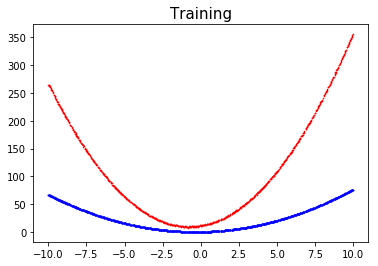

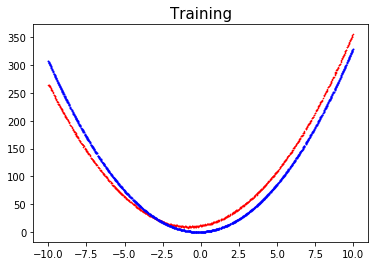

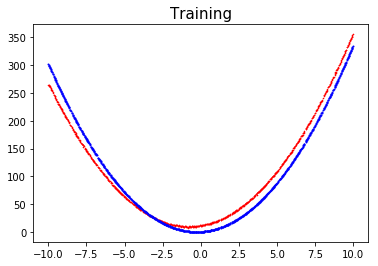

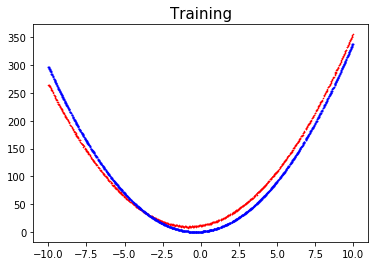

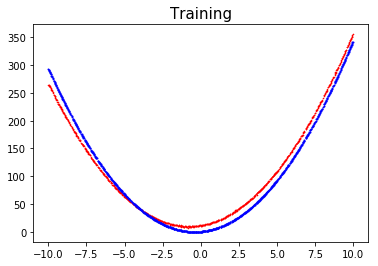

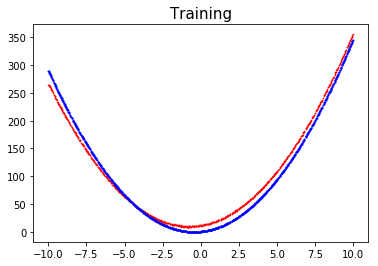

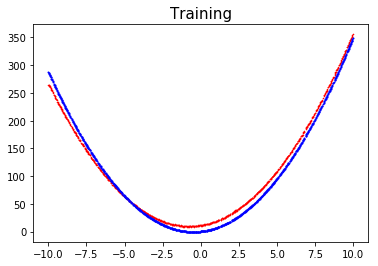

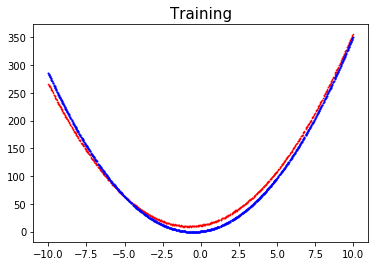

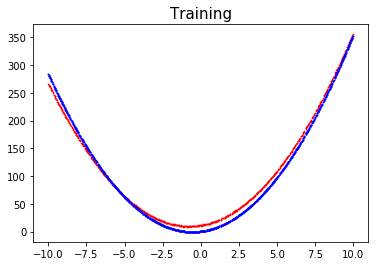

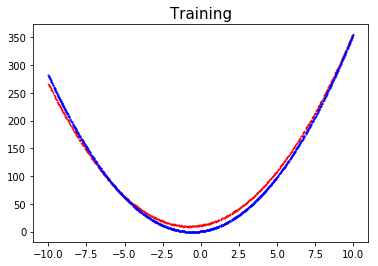

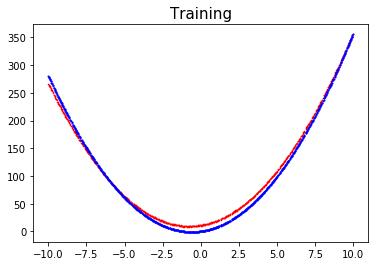

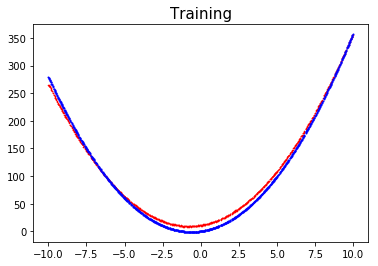

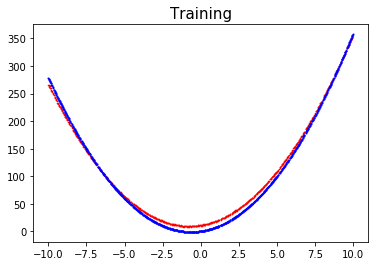

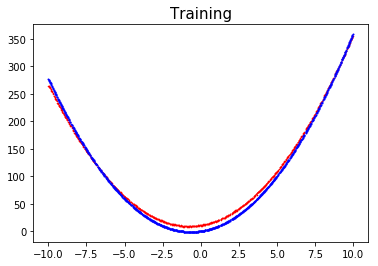

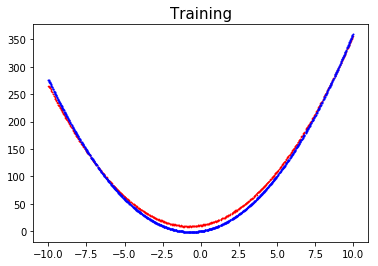

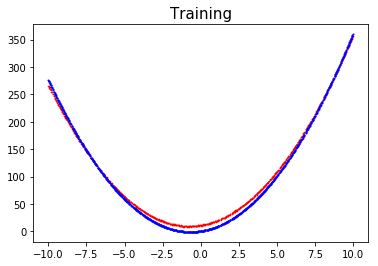

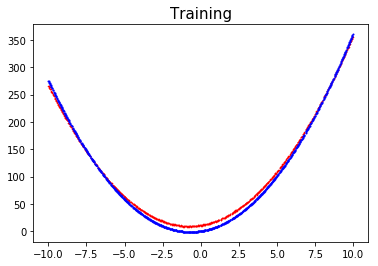

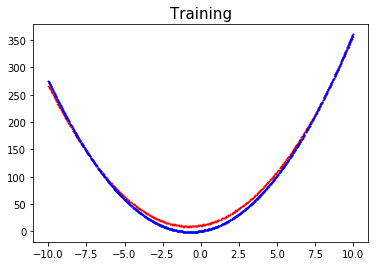

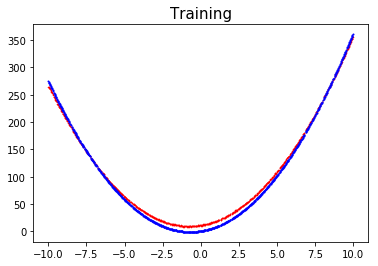

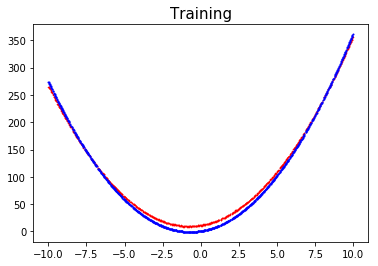

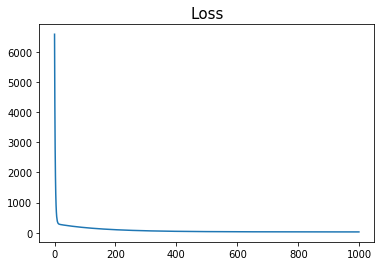

In [16]:
Epochs = 1000
learning_rate = 0.0001
W0 = np.random.normal(0,0.2,1)
W1 = np.random.normal(0,0.2,1)
W2 = np.random.normal(0,0.2,1)
Loss = []
for epoch in range(Epochs):
    dW0 = 0;dW1 = 0;dW2 = 0
    for n in range(Number_of_training):
        dW0 = dW0 + (W0 + W1*X_train[n] + W2*X_train[n]**2 - Y_train[n])*1
        dW1 = dW1 + (W0 + W1*X_train[n] + W2*X_train[n]**2 - Y_train[n])*X_train[n]
        dW2 = dW2 + (W0 + W1*X_train[n] + W2*X_train[n]**2 - Y_train[n])*X_train[n]**2
    W0 = W0 - learning_rate*dW0/Number_of_training
    W1 = W1 - learning_rate*dW1/Number_of_training
    W2 = W2 - learning_rate*dW2/Number_of_training
    Loss.append(compute_loss(X_train,Y_train,W0,W1,W2))
    if epoch%50==0:        
        plot_curve(X_train,Y_train,W0,W1,W2,'Training')
        print("Epoch : "+str(epoch)+"\\"+str(Epochs) + " Train loss: "+str(compute_loss(X_train,Y_train,W0,W1,W2)))
        


plot(range(len(Loss)),Loss,'Loss')
    
        
    
        


### Learning a 2nd order polynomial y = W0 + W1*x +W2* x^2

In [12]:
(2*3)**2

36